In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import librosa
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from glob import glob
from keras.models import Sequential
from keras import layers
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Define paths to your training and testing directories
train_dir = "C:/Users/DELL/Documents/Speech Recognition/cats_dogs/train"
test_dir = "C:/Users/DELL/Documents/Speech Recognition/cats_dogs/test"

# Prepare lists to hold labels and file paths
labels = []
paths = []

# Function to process the files in a directory
def process_directory(directory, label_name):
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        labels.append(label_name)
        paths.append(file_path)

# Process training data
process_directory(os.path.join(train_dir, 'cat'), 'cat')
process_directory(os.path.join(train_dir, 'dog'), 'dog')

# Process testing data
process_directory(os.path.join(test_dir, 'cat'), 'cat')
process_directory(os.path.join(test_dir, 'dog'), 'dog')

# Create a DataFrame from the lists
data_df = pd.DataFrame({
    'label': labels,
    'path': paths
})

# Display the first few and last few rows of the DataFrame together
head_and_tail = pd.concat([data_df.head(), data_df.tail()])
print("First and last few rows of the DataFrame:")
print(head_and_tail)

# Display a summary of the DataFrame
print("\nSummary of the DataFrame:")
print(data_df.describe(include='all'))

# Display the count of each label
label_counts = data_df['label'].value_counts()
print("\nCount of each label:")
print(label_counts)


First and last few rows of the DataFrame:
    label                                               path
0     cat  C:/Users/DELL/Documents/Speech Recognition/cat...
1     cat  C:/Users/DELL/Documents/Speech Recognition/cat...
2     cat  C:/Users/DELL/Documents/Speech Recognition/cat...
3     cat  C:/Users/DELL/Documents/Speech Recognition/cat...
4     cat  C:/Users/DELL/Documents/Speech Recognition/cat...
272   dog  C:/Users/DELL/Documents/Speech Recognition/cat...
273   dog  C:/Users/DELL/Documents/Speech Recognition/cat...
274   dog  C:/Users/DELL/Documents/Speech Recognition/cat...
275   dog  C:/Users/DELL/Documents/Speech Recognition/cat...
276   dog  C:/Users/DELL/Documents/Speech Recognition/cat...

Summary of the DataFrame:
       label                                               path
count    277                                                277
unique     2                                                277
top      cat  C:/Users/DELL/Documents/Speech Recognition/cat...
freq

In [3]:
data_df.to_csv("C:/Users/DELL/Downloads/train_test.csv",index=False)

# Data Visualization

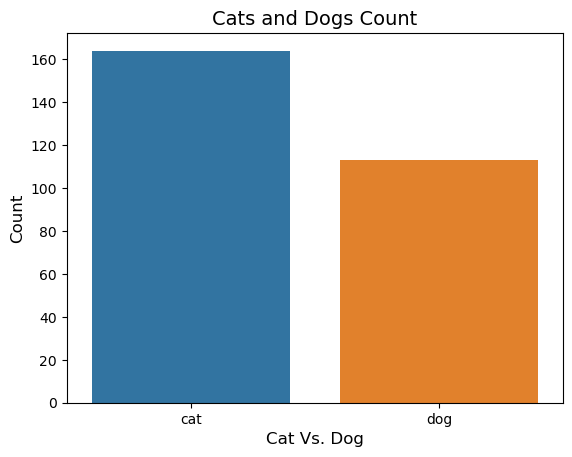

In [4]:
plt.title('Cats and Dogs Count', size = 14)
filtered_final_df = data_df[data_df['label']!='Unknown'] # creates a new DataFrame called filtered_final_df by removing any rows where the label is 'Unknown'. This ensures that the plot only includes cat and dog labels.

sns.countplot(data = filtered_final_df , x = 'label') # uses Seaborn's countplot function to create a bar plot that shows the count of 'cat' and 'dog' labels on the x-axis. Each bar represents the number of files labeled as either 'cat' or 'dog'.
plt.xlabel('Cat Vs. Dog',size = 12)
plt.ylabel('Count' , size = 12)

plt.show()

In [5]:
# creating functions to display the plots 

def waveplot_creation(data , sr , label): #sr is a sample rate
    plt.figure(figsize = (10,4))
    plt.title(f"{label} Waveplot")
    
    librosa.display.waveshow(data , sr = sr) # A plot showing the waveform of the audio, which represents how the amplitude of the sound varies over time.
    
    

def spectrogram_creation(data , sr , label):
    plt.figure(figsize=(12,3))
    plt.title(f"{label} Spectogram")
    
   
    S = librosa.stft(data) # short-time fourier transform
    # Imagine you're listening to a song, and you want to know all the notes (or pitches) being played. The Fourier Transform is like taking the entire song and figuring out which notes are in it, but it doesn't tell you when each note is played. It's like having a list of all the notes without knowing where they happen in the song.
    # Now, imagine you want to know not just which notes are in the song, but also when each note is played. The STFT helps with this. It breaks the song into small parts (like short clips), then figures out which notes are in each part. This way, you get a picture of both the notes and when they happen, almost like a timeline of the song showing when each note is played.
    Sdb = librosa.amplitude_to_db(S)
    
    librosa.display.specshow(Sdb , sr = sr ,  x_axis ='time' , y_axis = 'hz' )
    plt.colorbar() # Color intensity shows how strong each frequency is at each moment in time.
    plt.tight_layout()
    
    # "Mel" ده مقياس بيتعامل مع الترددات بطريقة مشابهة لإزاي وداننا بتسمع الصوت. يعني المقياس ده بيركز أكتر على الترددات اللي وداننا حساسة ليها أكتر، وبيقلل من تأثير الترددات اللي مش بنسمعها بسهولة.
    #تخيّل إنك بتسمع صوتين: واحد تردداته عالية زي صفارة، والتاني تردداته منخفضة زي صوت طبل. الـ Mel Spectrogram هيكون مصمم بحيث يدي اهتمام أكبر للترددات اللي ودانك بتسمعها بسهولة أكتر (زي صوت الطبل) ويقلل من تأثير الترددات العالية اللي مش بنسمعها بنفس السهولة (زي الصفارة).
    # بالطريقة دي، لما بنستخدم الـ Mel Spectrogram في تحليل الصوت، بنحصل على صورة أوضح وأقرب للي وداننا بتسمعه فعلاً.


def melspectrogram_creation(data , sr , label):
    plt.figure(figsize=(12,3))
    plt.title(f"{label} Mel Spectrogram")
    
    MS = librosa.feature.melspectrogram(y = data , sr=sr)
    MSdb = librosa.power_to_db(MS) # converts the Mel spectrogram from a power scale to a decibel scale. This makes it easier to visualize and interpret the intensity of the frequencies.
    
    librosa.display.specshow(MSdb , sr = sr , x_axis ='time' , y_axis = 'mel' , cmap = 'viridis') # A Mel spectrogram that shows how different frequencies (scaled to mimic human hearing) are present in the audio over time.
    # The Mel spectrogram represents how different frequencies are present over time, with the frequency scale adjusted to mimic human hearing.
    plt.colorbar()
    plt.tight_layout()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15732\2768294211.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sdb = librosa.amplitude_to_db(S)


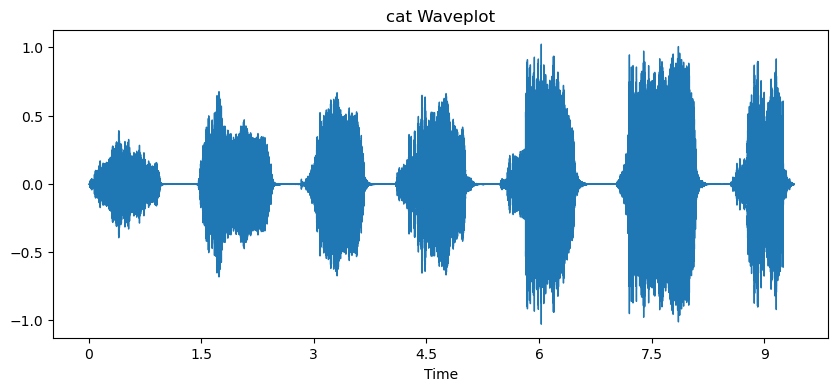

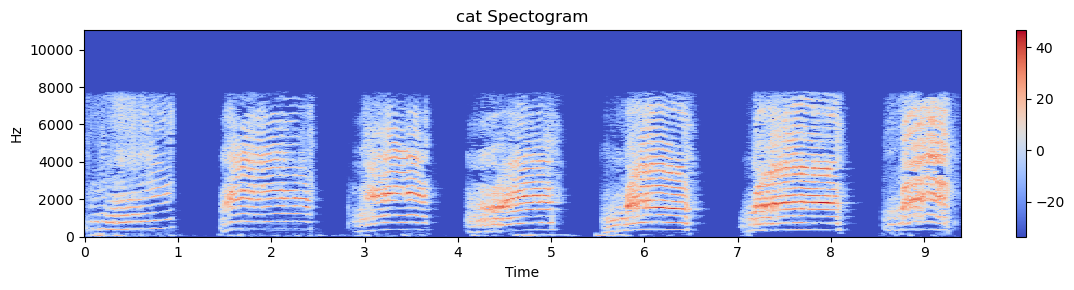

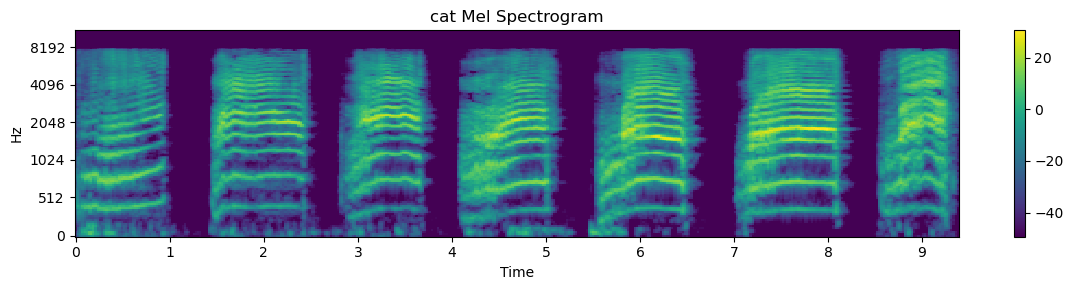

In [6]:
# to play the audio files
from IPython.display import Audio

label = 'cat'

path = np.array(data_df.path)[1] # selects the file path of the second audio file from the data_df DataFrame and stores it in the variable path
data , sampling_rate = librosa.load(path)

# generate and display
waveplot_creation(data , sampling_rate , label)
spectrogram_creation(data , sampling_rate , label)
melspectrogram_creation(data , sampling_rate , label)

Audio(path)

# Data Augumentation

In [7]:
# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data 
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching 
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
    
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


path = np.array(data_df.path)[1]
data , sampling_rate = librosa.load(path)

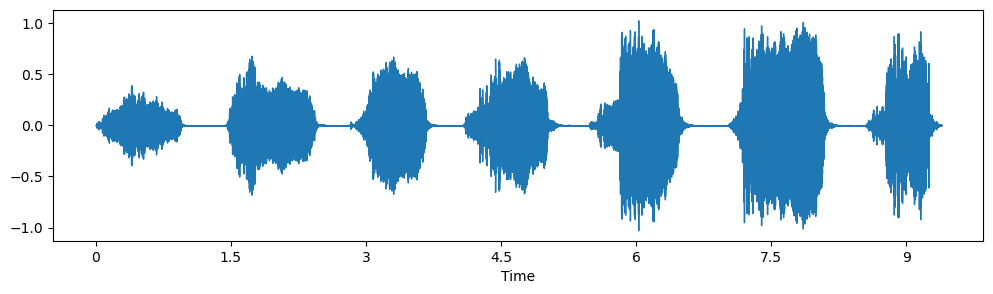

In [8]:
plt.figure(figsize = (12,3))
librosa.display.waveshow(y=data , sr = sampling_rate)

Audio(path)

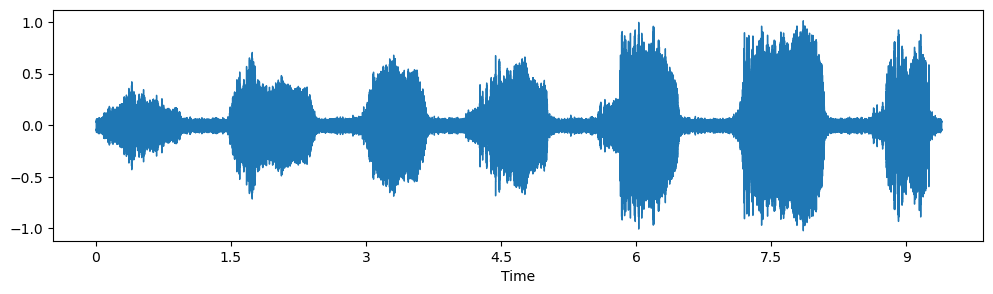

In [9]:
n = noise(data) # noise injected data
plt.figure(figsize=(12,3))
librosa.display.waveshow(y=n , sr = sampling_rate)
Audio(n , rate = sampling_rate)

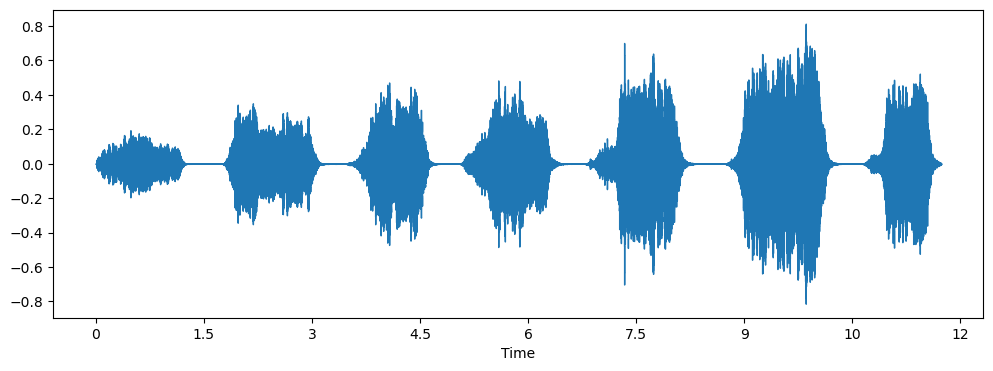

In [10]:
t_s = librosa.effects.time_stretch(data , rate = 0.8) # A rate less than 1.0 stretches the audio (slows it down), and a rate greater than 1.0 compresses it (speeds it up).


plt.figure(figsize=(12, 4))

librosa.display.waveshow(y=t_s, sr=sampling_rate)

Audio(t_s, rate=sampling_rate)

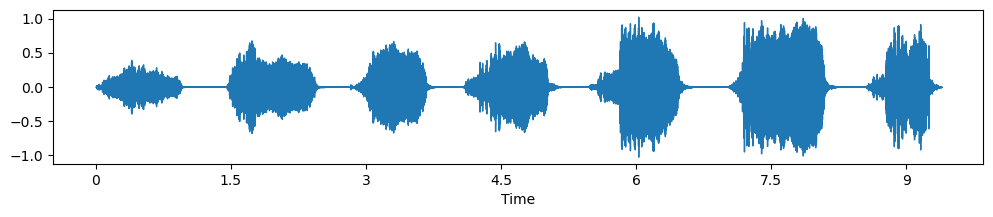

In [11]:
t_sh = time_shift(data) # The audio data shifted forward or backward in time by a random amount.
plt.figure(figsize=(12,2))
librosa.display.waveshow(data , sr = sampling_rate)

Audio(t_sh , rate = sampling_rate)

# Feature Extraction

In [12]:
def extract_features(data):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0) # MFCCs are used to extract key features from audio signals. These features capture the important characteristics of the sound, making them useful for tasks like speech recognition or music analysis.
    result = np.hstack((result, mfcc))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0) # The Mel spectrogram shows how the audio's frequency content varies over time
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
#     data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)
    
    res1 = extract_features(data) # extracts features from the original audio data.
    result = np.array(res1) # initializes result with the features extracted from the original audio.
    
    noise_data = noise(data) # adds noise to the original audio data using the noise function.
    res2 = extract_features(noise_data) # extracts features from the noisy audio data.
    result = np.vstack((result, res2)) # adds the features from the noisy audio to the result array.
    
    stretched_data = librosa.effects.time_stretch(data , rate = 0.8)
    stretched_pitch_data = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
    r3 = extract_features(stretched_pitch_data)
    result = np.vstack((result,r3))
    
    return result

In [13]:
def get_features(path, sample_rate=None):
    # Load the audio file with the specified sample rate, if provided
    audio, sr = librosa.load(path, sr=sample_rate)
    
    # Extract features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13) # calculates MFCC features from the audio, it extracts 13 MFCC features,
    
    # Flatten or process the features as required
    features = mfccs.mean(axis=1)
    
    return features

In [14]:
X, Y = [], []
print("Feature processing...")
for path, label, ind in zip(data_df.path, data_df.label, range(data_df.path.shape[0])):
    features = get_features(path)
    if ind % 500 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        Y.append(label)
print(f"{data_df.path.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
0 samples has been processed...
277 samples has been processed...
Done.


In [15]:
len(X), len(Y) , data_df.path.shape

(3601, 3601, (277,))

In [16]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv' ,index=False)
Features.head()

,0,labels
0,-280.531189,cat
1,102.627457,cat
2,-1.959248,cat
3,23.931303,cat
4,0.135133,cat


# Data Preparation

In [17]:
X = Features.iloc[: ,:-1].values 
Y = Features['labels'].values

# Splitting the dataset

In [18]:
encoder = OneHotEncoder() # used to transform categorical labels into one-hot encoded vectors.
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [19]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2, shuffle = True)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((2880, 1), (2880, 2), (721, 1), (721, 2))

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((2880, 1), (2880, 2), (721, 1), (721, 2))

In [21]:
x_train = np.expand_dims(x_train , axis = 2)
x_test = np.expand_dims(x_test , axis = 2)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((2880, 1, 1), (2880, 2), (721, 1, 1), (721, 2))

# MLP Model

In [22]:
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Output layer for 4 classes
])
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,474 (693.26 KB)

 Trainable params: 175,554 (685.76 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [23]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5313 - loss: 1.2404 - val_accuracy: 0.5964 - val_loss: 0.6752
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5328 - loss: 1.2749 - val_accuracy: 0.5964 - val_loss: 0.6858
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5255 - loss: 1.3235 - val_accuracy: 0.5964 - val_loss: 0.7002
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5062 - loss: 1.3256 - val_accuracy: 0.5964 - val_loss: 0.7079
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5330 - loss: 1.2064 - val_accuracy: 0.5964 - val_loss: 0.7134
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5171 - loss: 1.2835 - val_accuracy: 0.5964 - val_loss: 0.7187
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5235 - loss: 1.2376 - val_accuracy: 0.5964 - val_loss: 0.7251
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5601 - loss: 1.1840 - val_accuracy: 0.5964 - val_loss

# Model Evaluation

In [24]:
print("Accuracy of the model on the test data : " , model.evaluate(x_test,y_test)[1]*100,'%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.7275 
Accuracy of the model on the test data :  66.85159206390381 %


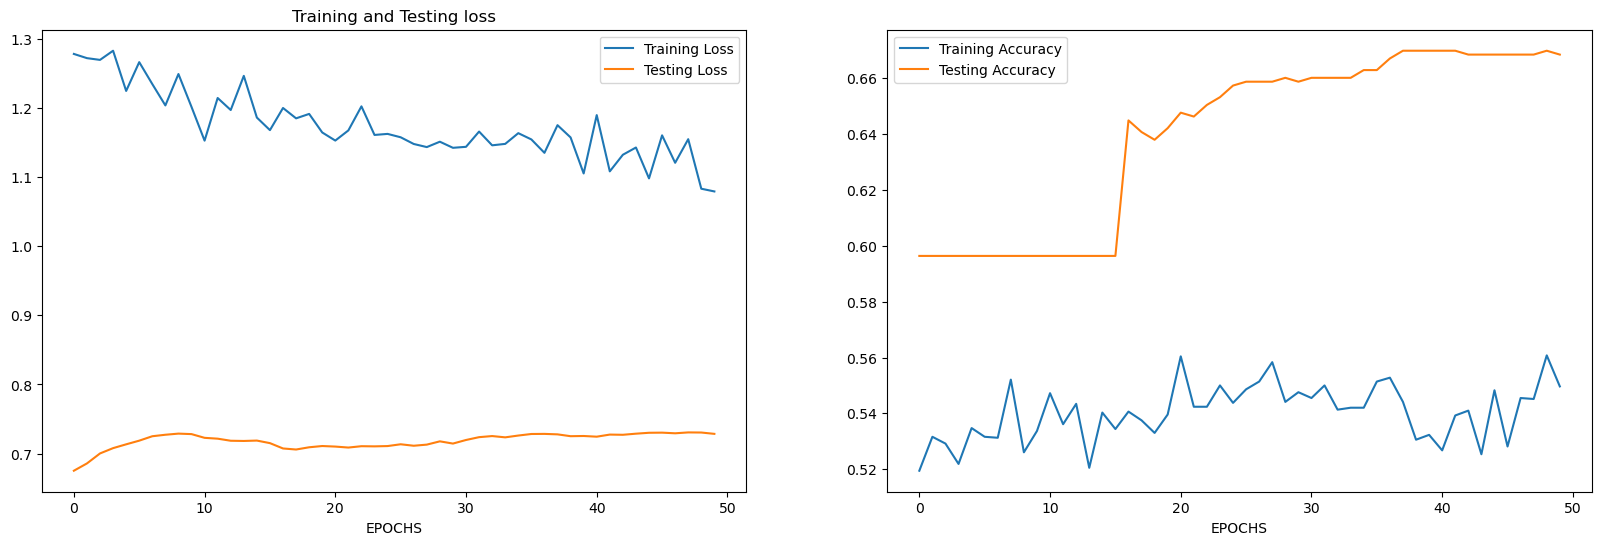

In [25]:
epochs = [i for i in range(50)] # as 50 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

In [26]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [27]:
pred_df = pd.DataFrame(columns=['Predicted Labels' ,'Actual Labels'])
pred_df['Predicted Labels'] = y_pred.flatten()
pred_df['Actual Labels'] = y_test.flatten()
pred_df.head(21)

,Predicted Labels,Actual Labels
0,cat,dog
1,cat,cat
2,dog,dog
3,cat,cat
4,cat,cat
5,cat,dog
6,cat,cat
7,cat,cat
8,cat,cat
9,cat,cat


# Confusion Matrix

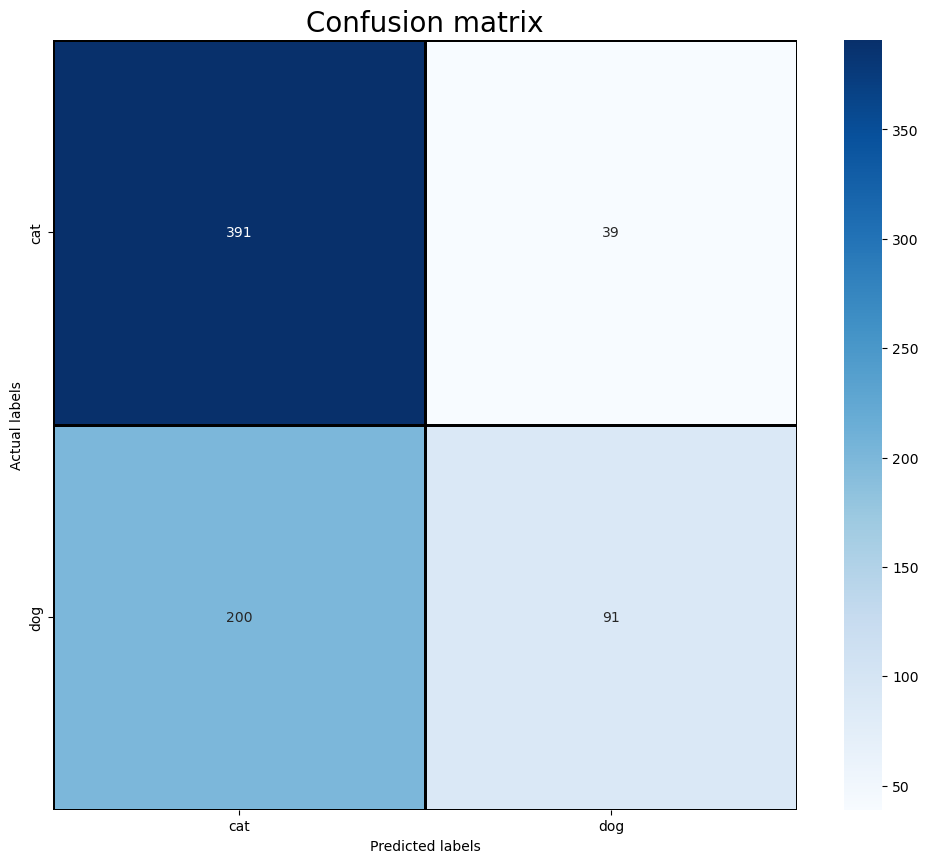

In [28]:
# Predict the values from the test set
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm , index =[i for i in encoder.categories_] , columns =[i for i in encoder.categories_])
sns.heatmap(cm , linecolor='black', cmap ='Blues' , linewidth=1, annot=True ,fmt='')
plt.title('Confusion matrix' , size = 20)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()